In [18]:
import pandas
#import warnings
#warnings.filterwarnings('ignore')
#import dask
#import dask.dataframe as dd
#from scipy.sparse import csr_matrix
#import numpy as np
#import pickle
#from tqdm import tqdm 
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder

#from collections import Counter
#sn.set()
#from seaborn import heatmap
#import geopandas as gpd
#import geoplot as gplty
#import tqdm as tqdm
import random
import cmd

In [19]:
df = pandas.read_csv("../data/raw/train_ver2.csv", nrows=10000)

In [20]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2015-01-28,1065716,N,ES,V,27,2012-09-24,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9996,2015-01-28,1065717,N,ES,V,24,2012-09-24,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9997,2015-01-28,1065719,N,ES,H,23,2012-09-24,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9998,2015-01-28,1065649,N,ES,H,30,2012-09-24,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [21]:
df.shape


(10000, 48)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_dato             10000 non-null  object 
 1   ncodpers               10000 non-null  int64  
 2   ind_empleado           9950 non-null   object 
 3   pais_residencia        9950 non-null   object 
 4   sexo                   9950 non-null   object 
 5   age                    10000 non-null  object 
 6   fecha_alta             9950 non-null   object 
 7   ind_nuevo              9950 non-null   float64
 8   antiguedad             10000 non-null  object 
 9   indrel                 9950 non-null   float64
 10  ult_fec_cli_1t         12 non-null     object 
 11  indrel_1mes            9950 non-null   float64
 12  tiprel_1mes            9950 non-null   object 
 13  indresi                9950 non-null   object 
 14  indext                 9950 non-null   object 
 15  con

In [23]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [24]:
# type 5 samples per columns
for col in df.columns:
    print('{}\n'.format(df[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel_1mes, d

In [25]:
df2 = df.dropna(how='all')

In [26]:
df2.shape

(10000, 48)

In [27]:
#Lets change the feature names from spainish to english based on the meaning
cols = ['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'income', 'segmentation', 
'savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit'
]
df.columns = cols

print('New column names \n')
cmd.Cmd().columnize(cols, displaywidth=80)


New column names 

fetch_date            cust_rel         savings_account     e_account   
cust_code             residence_index  guarentees          funds       
emp_index             foreigner_index  current_account     mortgage    
country               spouse_index     derivative_account  pension     
sex                   joining_channel  payroll_account     loan        
age                   deceased         junior_account      tax         
cust_date             address_type     mas_account         credit_card 
new_cust              prov_code        perticular_account  securities  
cust_seniority        prov_name        perticular_plus     home_account
indrel                activity_index   st_deposit          payroll     
last_date_as_primary  income           mt_deposits         pension2    
cust_type             segmentation     lt_deposits         direct_debit


In [28]:
df.isnull().sum()

fetch_date                  0
cust_code                   0
emp_index                  50
country                    50
sex                        50
age                         0
cust_date                  50
new_cust                   50
cust_seniority              0
indrel                     50
last_date_as_primary     9988
cust_type                  50
cust_rel                   50
residence_index            50
foreigner_index            50
spouse_index            10000
joining_channel            50
deceased                   50
address_type               50
prov_code                  54
prov_name                  54
activity_index             50
income                   1899
segmentation               50
savings_account             0
guarentees                  0
current_account             0
derivative_account          0
payroll_account             0
junior_account              0
mas_account                 0
perticular_account          0
perticular_plus             0
st_deposit

In [29]:
df

,fetch_date,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2015-01-28,1065716,N,ES,V,27,2012-09-24,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9996,2015-01-28,1065717,N,ES,V,24,2012-09-24,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9997,2015-01-28,1065719,N,ES,H,23,2012-09-24,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9998,2015-01-28,1065649,N,ES,H,30,2012-09-24,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [30]:
for col in df.columns:
    print('{}\n'.format(df[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fetch_date, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: cust_code, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: emp_index, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: country, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sex, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: cust_date, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: new_cust, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: cust_seniority, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: last_date_as_primary, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: cust_type, dtype:

In [31]:
#Target columns or products
target_columns = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']

user_features = ['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'income', 'segmentation']

In [32]:
#plotting number of purchases in each month
dummy = new_purchases[['fetch_date']+target_columns].groupby('fetch_date').sum()
dummy.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(20,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Number of purchases in each month')
plt.show()
print('-'*150)
#Plotting the distribution of products in each month
dummy = new_purchases[['fetch_date']+target_columns].groupby('fetch_date').sum()
dummy = dummy/dummy.sum()
dummy = dummy.T
dummy.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(20,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Distribution of products in each month')
plt.show()

NameError: name 'new_purchases' is not defined

C:\Users\Admin\AppData\Local\Temp\ipykernel_7916\1457009976.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df["age"].dropna(),


ValueError: could not convert string to float: ' NA'

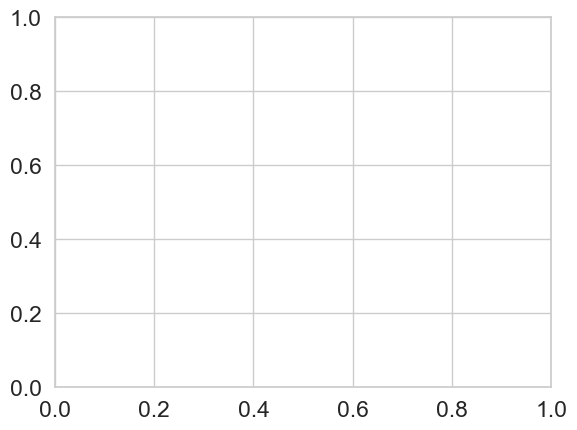

In [37]:
with sn.plotting_context("notebook",font_scale=1.5):
    sn.set_style("whitegrid")
    sn.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sn.plt.title("Age Distribution")
    plt.ylabel("Count")